## 3.1 검색 알고리즘이란?

* 검색과 키
> 검색(search) : 주어진 데이터에서 키 값에 해당하는 자료를 찾는 것, 또는 어떤 조건을 만족하는 데이터를 찾아내는 것<br>
> 키(key) : 검색할 때 주목하는 항목
<br> 대부분 키는 데이터의 일부이다. 데이터가 간단한 정숫값이나 문자열이면 데이터값이 그대로 키값이 될 수도 있다.

* 검색의 종류
1. 배열 검색 (3장)
     <br> - 선형 검색 (linear search) : 무작위로 늘어놓은 데이터 집합에서 검색을 수행
     <br> - 이진 검색 (binary search) : 일정한 규칙으로 늘어놓은 데이터 집합에서 아주 빠른 검색을 수행
     <br> - 해시법 (Hash search) : 추가/삭제가 자주 일어나는 데이터 집합에서 아주 빠른 검색을 수행 (체인법, 오픈 주소법)
2.   연결 리스트 검색 (8장)
3.   이진 탐색 트리 검색 (9장)



데이터 집합에서 단순히 검색만 잘되면 되는 상황이라면 계산 시간이 짧은 검색 알고리즘을 우선시 해야한다. <br> 하지만 검색뿐만 아니라 데이터의 추가/삭제를 자주 수행해야한다면, 검색 이외의 작업에 들어가는 비용을 고려하여 알고리즘을 선택해야한다.

## 3.2 선형 검색

* 선형 검색(linear search)
<br> - 선형으로 늘어선 배열에서, 우리가 원하는 키 값을 가진 원소를 찾을 때까지 **맨 앞부터 순서대로 스캔하여** 검색하는 알고리즘
<br> - 순차 검색(sequential search) 이라고 부르기도 한다.

선형 검색의 종료 조건 (두가지)
1. 검색할 값을 찾지 못하고 배열의 맨 끝을 지날 경우 = 검색 실패
2. 검색할 값과 같은 원소를 찾는 경우 = 검색 성공

배열 원소의 개수가 n개라면 이 조건을 판단하는 횟수는 평균 $ \frac {n}{2} $ 번 이다
<br>배열에 원하는 값이 없는 경우 1번 -> n+1번, 2번 -> n번 실행된다.

In [ ]:
# 배열 a에서 검색하는 프로그램
a = [6, 4, 3, 2, 1, 2, 8]
key = 3

i = 0

while True :
    if i == len(a):
        print("검색 실패")
        print("우리가 찾는 값은 배열에 존재하지 않습니다.")
        break
    if a[i] == key:
        print("검색 성공")      # 찾은 원소의 인덱스 = i
        print(f'우리가 찾는 값은 배열의 {i+1}번째에 존재한다.')
        break
    i += 1


In [ ]:
# 실습 3-1
# while 문으로 작성한 선형 검색 알고리즘

from typing import Any, Sequence

def seq_search(a: Sequence, key: Any) -> int:       # seq_search 함수는 배열 a는 시퀀스형, 변수 key는 아무 자료형으로 취하고 int형으로 반환한다.
    """시퀀스 a에서 key값이 같은 원소를 선형 검색(while 문)"""
    i = 0

    while True:
        if i == len(a):
            return -1  # 검색에 실패하면 -1을 반환
        if a[i] == key:
            return i   # 검색에 성공하면 현재 조사한 배열의 인덱스를 반환
        i += 1

if __name__ == '__main__':      # 따로 모듈을 실행한게 없으니까 __name__에는 __main__이라는 값이 들어가 있음.
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))      # 배열 각각의 인덱스에 원소 직접 입력받기

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받기

    idx = seq_search(x, ky)                     # ky와 같은 원소를 x에서 검색하는 함수 실행

    if idx == -1:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

 Type annotation/ Type hint
> 04 : from typing import Any, Sequence 에서<br>
Any : 제약이 없는 임의의 자료형, Sequence : 시퀀스형(리스트, 배열, 문자열, 튜플 등등) 을 의미한다.

> 파이썬에서는 변수에 값을 저장할 때, 메모리에 값을 저장하는게 아니라 id에 연결을 시키는 것이기 때문에 값의 타입을 지정하기 위해서는 typing을 사용해줘야한다.<br>
> 
> https://www.daleseo.com/python-type-annotations/

내장변수 __ name __
> 현재 모듈의 이름을 담고 있는 내장변수

> 모듈 안에 있는 __ name __ 에는 모듈의 이름이 담겨져 있고, 직접 실행한 파일 내부에 있는 __ name __ 에는 __ main __ 이라는 값이 담겨져 있다.
> <br> 예제 : https://hyoje420.tistory.com/45

선형 탐색에서 값이 key인 원소가 여러개 존재하는 경우에는 스캔 과정에서 맨 처음 발견한 원소를 반환한다.

In [ ]:
# 값이 key인 원소가 여러개 존재하는 경우, 인덱스 모두 찾기

if __name__ == '__main__':      # 따로 모듈을 실행한게 없으니까 __name__에는 __main__이라는 값이 들어가 있음.
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))      # 배열 각각의 인덱스에 원소 직접 입력받기

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받기

    print()

    no = x.count(ky)
    print(f'{ky}은 배열 x 안에 {no}개 존재합니다.')

    find_idx = []

    for i in range(num):
        find_idx.append(x.index(ky, i, num))
        i += 1
    print(f'{ky}는 배열의 {set(find_idx)}번째에 존재합니다.')

In [ ]:
1# 실습 3-2
# for 문으로 작성한 선형 검색 알고리즘

from typing import Any, Sequence

def seq_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key값이 같은 요소를 선형 검색(for 문)"""
    for i in range(len(a)):
        if a[i] == key:
            return i  # 검색 성공(인덱스를 반환)
    return -1         # for문 다 돌려서 key과 같은 값이 배열 안에 없으면 검색 실패(-1을 반환)

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받음

    idx = seq_search(x, ky)                     # ky와 값이 같은 요소를 x에서 검색

    if idx == -1:
        print('검색 값을 갖는 요소가 존재하지 않습니다.')
    else:
        print(f'검색 값은 x[{idx}]에 있습니다.')

배열 맨 앞부터 순서대로 원소를 스캔하는 **선형 검색은 원소의 값이 정렬되지 않은 배열에서 검색할 때 사용하는 유일한 방법**이다.




---



(보충 3-1) 다양한 자료형인 시퀀스에서 검색

In [ ]:
# 실습 3C-1
# seq_search() 함수를 사용하여 실수 검색하기
# float형인 실수(부동 소수점 수)의 배열에서 검색하는 프로그램

# from ssearch_while import seq_search      # 구글 코랩을 사용할 경우에는 필요하지 않다.

print('실수를 검색합니다.')
print('주의: "End"를 입력하면 종료합니다.')

number = 0      # 초기값 설정
x = []          # 빈 리스트 x를 생성

while True:
    s = input(f'x[{number}]: ')     # 빈 리스트 x에 원소 직접 입력받기
    if s == 'End':
        break
    x.append(float(s))  # 배열 마지막에 원소를 추가(append), 문자열 상태인 원소 s를 실수형으로 변환 후 추가
    number += 1

ky = float(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력

idx = seq_search(x, ky)  # ky와 같은 값의 원소를 x에서 검색
if idx == -1:
    print('검색값을 갖는 원소가 존재하지 않습니다.')
else:
    print(f'검색값은 x[{idx}]에 있습니다.')

In [ ]:
# 실습 3C-2
# seq_search() 함수를 사용하여 특정 인덱스 검색하기
# 3개의 배열에서 특정 인덱스를 각각 검색하는 프로그램

# from ssearch_while import seq_search

t = (4, 7, 5.6, 2, 3.14, 1)
s = 'string'
a = ['DTS', 'AAC', 'FLAC']

print(f'{t}에서 5.6의 인덱스는 {seq_search(t, 5.6)}입니다.')        # seq_search(검색할 배열, 찾고자하는 값)
print(f'{s}에서 "n"의 인덱스는 {seq_search(s, "n")}입니다.')
print(f'{a}에서 "DTS"의 인덱스는 {seq_search(a, "DTS")}입니다.')

---

* 보초법
<br> 선형 검색 반복시에 종료 조건을 검사하는 비용(cost)을 반으로 줄이기 위해 사용하는 방법

> 검색할 값을 배열의 맨 끝에 추가한 후, 선형 검색을 한다. 이 때 맨 끝에 저장하는 값을 보초(sentinel)라고 한다.

> 검색할 값과 같은 원소를 발견해야 하는게 목적이므로 맨 끝에 도달했는지의 판단이 필요없다. 만약 찾으려는 원소가 배열의 맨 끝에 있다면 존재하지 않는다는 결론을 내리면 된다.

> 선형 검색의 종료 조건 중 하나인 " 값을 찾지 못하고 배열의 맨 끝을 지나갔다 " 에 대해서 판단할 필요가 없으므로 보초는 반복을 종료하는 판단 횟수를 줄이는 역할을 한다.

In [ ]:
# 실습 3-3
# 선형 검색 알고리즘(실습 3-1)을 보초법으로 수정

from typing import Any, Sequence
import copy

def seq_search(seq: Sequence, key: Any) -> int:
    """시퀀스 seq에서 key와 일치하는 원소를 선형 검색(보초법)"""
    a = copy.deepcopy(seq)  # seq를 복사
    a.append(key)           # 보초 key를 추가
 
    i = 0
    while True:
        if a[i] == key: 
            break  # 검색에 성공하면 while 문을 종료    # 보초법을 사용했으므로 무조건 i 값을 찾을 수 있음.
        i += 1
    return -1 if i == len(seq) else i

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))  # num 값을 입력
    x = [None] * num                           # 원소 수가 num인 배열을 생성    # num=3 이면 x = [None, None, None]

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 키 ky를 입력받기

    idx = seq_search(x, ky)                     # ky값과 같은 원소를 x에서 검색

    if idx == -1:
         print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

보초법을 사용함으로써 if문의 판단 횟수는 절반으로 줄지만, <br> 찾은 원소가 배열의 원래 데이터인지 보초인지 판단해야하기 때문에 판단 횟수가 1번 늘어난다.

## 3.3 이진 검색

* 이진 검색(binary search)
> 이진 검색은 선형 검색보다 빠르게 검색 할 수 있다.
><br> 이진 검색 알고리즘을 사용하기 위해서는 배열의 원소들이 정렬(sort) 상태여야 한다.

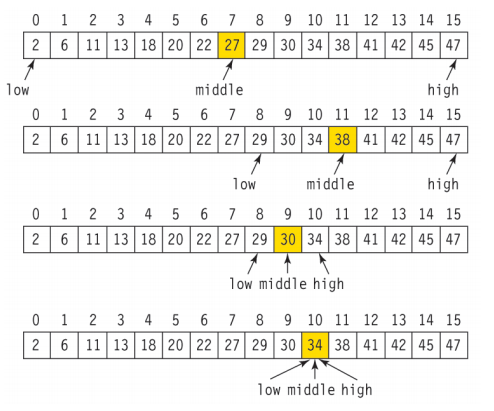

이진 탐색 용어
> a = sequence(배열)
> <br> pl : 검색 범위의 맨 앞 인덱스 (left) -> 초기값 = 0
> <br> pc : 검색 범위의 중앙 인덱스 (center) -> 초기값 = (n - 1) // 2
> <br> pr : 검색 범위의 맨 뒤 인덱스 (right) -> 초기값 = n - 1
> <br> key : 찾고자 하는 값




이진 탐색 과정
> a[pc] < key 일 경우, 
<br> pl = pc+1 로 변경하여 검색 범위를 배열의 뒤쪽 절반으로 좁힌다.

> a[pc] > key 일 경우, 
<br> pr = pc-1 로 변경하여 검색 범위를 배열의 앞쪽 절반으로 좁힌다.

이진 탐색의 종료 조건
1. a[pc] ==  key  인 경우
2. 검색 범위가 더 이상 없는 경우

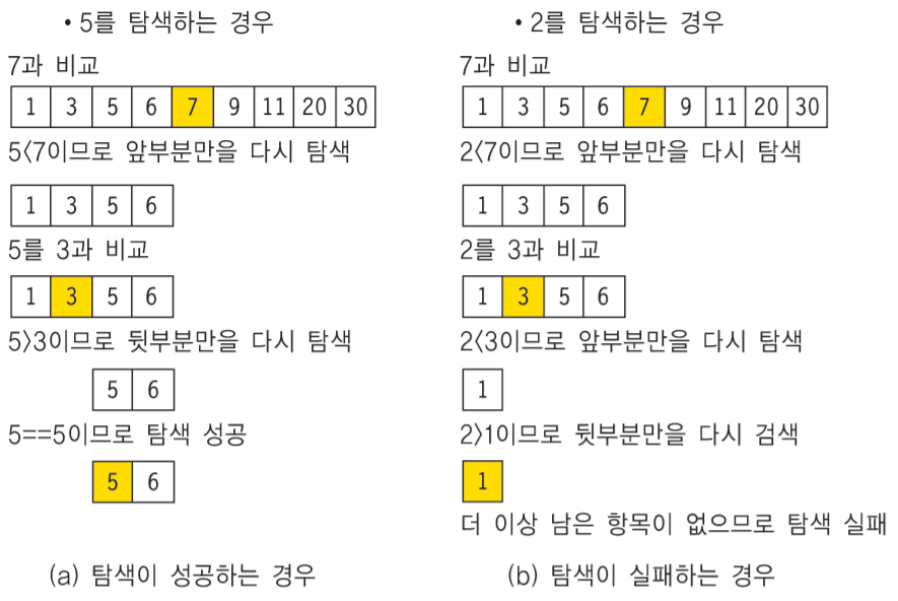

In [ ]:
# 실습 3-4
# 이진 검색 알고리즘

from typing import Any, Sequence

def bin_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색"""
    # 초기값 설정
    pl = 0           # 검색 범위 맨 앞 원소의 인덱스
    pr = len(a) - 1  # 검색 범위 맨 끝 원소의 인덱스    # 인덱스가 0부터 시작하니까 배열 원소 갯수 - 1로 계산해줘야함.

    while True:
        pc = (pl + pr) // 2  # 중앙 원소의 인덱스
        if a[pc] == key:
            return pc    # 검색 성공
        elif a[pc] < key:
            pl = pc + 1  # 검색 범위를 중앙값 뒤쪽의 절반으로 좁힘
        else:
            pr = pc - 1  # 검색 범위를 중앙값 앞쪽의 절반으로 좁힘
    return -1            # 검색 실패

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    print('배열 데이터를 오름차순으로 입력하세요.')

    x[0] = int(input('x[0]: '))

    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}]: '))
            if x[i] >= x[i - 1]:        # 바로 직전에 입력한 원소값보다 큰 값을 입력해야지만 넘어감. 아닐 경우에는 다시 입력하게끔 무한반복됨.
                 break

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 ky를 입력

    idx = bin_search(x, ky)                     # ky와 같은 값의 원소를 x에서 검색

    if idx == -1:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

이진 검색 알고리즘은 반복할 때마다 검색 범위가 거의 절반으로 줄어들기 때문에 검색하는데 필요한 비교횟수는 **평균 log n** 이다.
<br> 왜? : https://pw4ngc0.tistory.com/105

---

* 복잡도 (Complexity)
<br> 알고리즘의 성능을 객관적으로 평가하는 기준

> 시간 복잡도(time complexity) : 입력된 N의 크기에 따라 실행되는 연산의 수를 나타냄
> <br> 공간 복잡도(space complexity) : 메모리와 파일 공간이 얼마나 필요한지를 평가

알고리즘을 평가할때 '최상의 경우'에는 대부분 긍정적인 결과가 나오기 때문에 평가하기 애매하고,
<br> '평균적인 경우'를 알기 위해서는 너무 많은 자료가 필요하기 때문에
<br> 보통 **'최악의 경우'를 가지고 평가를 많이한다. 최악의 => 빅오 표기법으로 시간복잡도를 나타낸다.**

입력값의 크기에 따라 함수의 증가량을 성장률이라고 한다. 이때 중요하지 않은 상수와 계수들을 제거하면 알고리즘의 실행시간에서 중요한 성장률에 집중할 수 있는데 이것을 점근적 표기법(Asymptotic notation)이라 한다.

<br>시간복잡도를 나타내는 점근적표기법
> 최상의 경우 : 오메가 표기법
<br> 평균의 경우 : 세타 표기법
<br> 최악의 경우 : 빅오 표기법

https://blog.chulgil.me/algorithm/


선형 검색의 시간 복잡도
> 최선의 경우(한번에 key값을 찾을경우) = 시행횟수 1 = $O(1)$
> <br> 평균적인 경우 = 시행횟수 $\frac {3n}{4}$ = $O(n)$
> <br> 최악의 경우(제일 마지막에 key값을 찾을경우) = 시행횟수 n = $O(n)$
<br> 왜? https://zelord.tistory.com/10

> **선형 검색의 시간 복잡도는 $O(n)$**

이진 탐색의 시간 복잡도
> 최선의 경우 = 시행횟수 1 = $O(1)$
> <br> 평균적인 경우 = 시행횟수 $log{_2}{n}$ = $O(log(n))$
> <br> 최악의 경우 = 시행횟수 $log{_2}{(n+1)}$ = $O(log(n))$
> <br>왜? https://bite-sized-learning.tistory.com/226

>  **이진 탐색의 시간 복잡도는 $O(log(n))$**

(보충 3-2) index() 함수로 검색하기

리스트 또는 튜플에서 검색은 각 클래스의 index()함수로 수행할 수 있다.
<br> 함수 형식 :  $(list / tuple).index(value, start, stop)$

In [ ]:
# 선형 검색 알고리즘(검색에 실패하면 ValueError를 보냄)

from typing import Any, Sequence

def seq_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 값이 같은 요소를 선형 검색(for 문)"""
    for i in range(len(a)):
        if a[i] == key:
            return i        # 검색 성공(첨자를 반환)
    raise ValueError        # 검색 실패     # raise => 강제로 예외처리 시키기

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    ky = int(input('검색할 값을 입력하세요.: '))  # 키 ky를 입력받음

    try:
        idx = seq_search(x, ky)  # ky와 값이 같은 요소를 x에서 검색     # try문 => 예외처리 하고싶은 코드를 작성
    except ValueError:
        print('검색 값을 갖는 요소가 존재하지 않습니다.')               # except문 => try문에서 에러 발생했을 때 에러를 어떻게 처리할 것인지 작성
    else:
        print(f'검색 값은 x[{idx}]에 있습니다.')

In [ ]:
# 이진 검색 알고리즘(검색에 실패할 때 ValueError를 내보냄）

from typing import Any, Sequence

def bin_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 일치하는 요소를 이진 검색"""
    pl = 0           # 검색 범위 맨 앞 요소의 인덱스
    pr = len(a) - 1  # 검색 범위 맨 끝 요소의 인덱스

    while True:
        pc = (pl + pr) // 2  # 중앙 요소의 인덱스
        if a[pc] == key:
            return pc  # 검색 성공
        elif a[pc] < key:
            pl = pc + 1  # 검색 범위를 뒤쪽 절반으로 좁힘
        else:
            pr = pc - 1  # 검색 범위를 앞쪽 절반으로 좁힘
        if pl > pr:
            break
    raise ValueError  # 검색 실패

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수 num인 배열을 생성

    print('오름차순으로 입력하세요.')

    x[0] = int(input('x[0] : '))

    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}] : '))
            if x[i] >= x[i - 1]:
                 break

    ky = int(input('검색할 값을 입력하세요.: '))  # 키 ky를 입력받음

    try:
        idx = bin_search(x, ky)   # ky와 같은 값의 요소를 x에서 검색      # try문 => 예외처리 하고싶은 코드를 작성
    except ValueError:
        print('검색값을 갖는 요소가 존재하지 않습니다.')                  # except문 => try문에서 에러 발생했을 때 에러를 어떻게 처리할 것인지 작성
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

파이썬에서 try, except, raise 이용하여 예외 처리하기<br>
https://justkode.kr/python/try-except

(보충 3-3) 이진 검색의 실행 과정 출력하기

In [ ]:
# 실습 3C-3
# 이진 검색 알고리즘의 실행 과정을 출력

from typing import Any, Sequence

def bin_search(a: Sequence, key: Any) -> int:
    """시퀀스 a에서 key와 일치하는 원소를 이진 검색(실행 과정을 출력)"""
    pl = 0           # 검색 범위 맨 앞 원소의 인덱스
    pr = len(a) - 1  # 검색 범위 맨 끝 원소의 인덱스

    print('   |', end='')
    for i in range(len(a)):
        print(f'{i : 4}', end='')       # { :숫자} => 해당 필드의 최소 문자 폭을 의미 : 4칸씩 띄워서 표시하겠다는 뜻
    print()
    print('---+' + (4 * len(a) + 2) * '-')

    while True:
        pc = (pl + pr) // 2  # 중앙 원소의 인덱스

        print('   |', end='')
        if pl != pc:         # pl 원소 위에 <-를 출력
            print((pl * 4 + 1) * ' ' + '<-' + ((pc - pl) * 4) * ' ' + '+', end='')
        else: 
            print((pc * 4 + 1) * ' ' + '<+', end='')
        if pc != pr:         # pr 원소 위에 ->를 출력
            print(((pr - pc) * 4 - 2) * ' ' + '->')
        else:
            print('->')
        print(f'{pc:3}|', end='')
        for i in range(len(a)):
            print(f'{a[i]:4}', end='') 
        print('\n   |')

        if a[pc] == key:
            return pc    # 검색 성공
        elif a[pc] < key:
            pl = pc + 1  # 검색 범위를 뒤쪽의 절반으로 좁힘
        else:
            pr = pc - 1  # 검색 범위를 앞쪽의 절반으로 좁힘
        if pl > pr:  
            break
    return -1            # 검색 실패

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num  # 원소 수가 num인 배열을 생성

    print('배열 데이터를 오름차순으로 입력하세요.')

    x[0] = int(input('x[0]: '))

    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}]: '))
            if x[i] >= x[i - 1]:
                 break

    ky = int(input('검색할 값을 입력하세요.: '))  # 검색할 ky를 입력

    idx = bin_search(x, ky)                     # ky와 같은 값의 원소를 x에서 검색

    if idx == -1:
        print('검색값을 갖는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

## 3.4 해시법

* 정렬된 배열에 원소 추가하기
> Step1. 추가하려는 원소의 위치를 찾기 위해 이진 탐색법으로 검사 (주의 : 배열 오름차순으로 정렬)
> <br> Step2. 추가할 위치에 있는 원소부터 배열의 맨 끝까지의 원소를 한칸씩 뒤로 이동
> <br> Step3. 새로운 원소를 비어있는 자리에 대입

정렬된 배열에서 원소를 추가/삭제 할 경우, 시간 복잡도는 $O(n)$이다.


---

* 해시법(hashing)
<br> '데이터를 저장할 위치 = 인덱스' 를 간단한 연산으로 구현하는 것

해시값(hash value) 이란?
> 데이터에 접근할 때 기준이 되는 값,
> <br>배열의 각각의 원소에 $mod(원소의갯수)$ 씌운 값

> 이렇게 키를 해시값으로 변환하는 과정을 **해시 함수(hash function)**이라고 한다.

해시 테이블(hash table) 이란?
> 해시값을 인덱스로 하여 원소를 새로 저장한 배열

> 해시 테이블에서 만들어진 원소를 **버킷(bucket)**이라고 한다.

---

* 해시 충돌
<br> 추가하려는 원소의 해시값과 배열에 원래 있던 원소의 해시값이 같을 수 있다. 
<br> 이렇게 저장할 버킷이 중복되는 현상을 **충돌(collision)**
이라고 한다.

<br> 키와 해시값이 1:1 대응 관계일 필요는 없다. 일반적으로 키와 해시값은 (n:1) 이다.

충돌할 경우 해결방법
1. 체인법 : 해시값이 같은 원소를 연결 리스트로 관리한다.
2. 오픈 주소법 : 빈 버킷을 찾을 때까지 해시를 반복한다.

---

* 체인법 (chaining)
<br> 해시값이 같은 데이터를 체인 모양의 연결 리스트로 연결하는 방법
<br> **오픈 해시법(open hashing)**이라고 부르기도 한다.


> 체인법에서는 해시값이 같은 데이터를 연결 리스트에 의해 체인모양으로 연결한다.
> <br> 배열의 각 버킷(해시 테이블)에 저장하는 것은 인덱스를 해시값으로 하는 연결 리스트의 앞쪽노드(head node)를 참조한다.

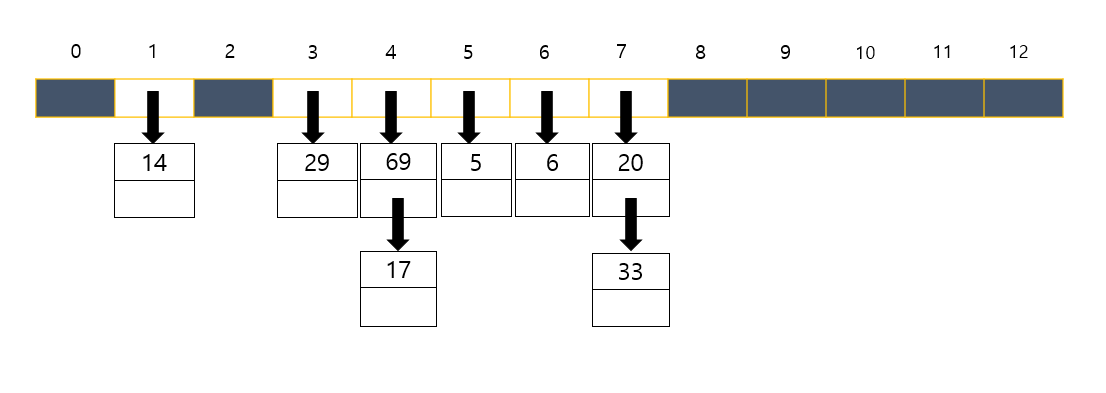
<br>(예시) table[4]는 버킷 69를 참조, 버킷 69의 뒤쪽 포인터는 17을 참조, 버킷 17의 뒤쪽 포인터는 참조하는 값이 없다(None)

In [ ]:
# 체인법으로 해시 함수 구현하기
# 실습 3-5 [A]
from __future__ import annotations      # __future__ => 상위버전 기능 사용 가능하게 만들어줌    # import annotations => 11행의 주석 달기 오류 발생 방지용
from typing import Any, Type
import hashlib

# 노드 클래스 만들기
class Node:    
    """해시를 구성하는 노드"""

    def __init__(self, key: Any, value: Any, next: Node) -> None:       # 자료형을 주석으로 달아준 것
        """초기화"""
        self.key   = key    # 키(원래 배열에 있던 값)
        self.value = value  # 값(해시함수를 통과한 해시값)
        self.next  = next   # 뒤쪽 노드를 참조(연결 리스트)


# 실습 3-5 [B]
# ChainedHash 해시 클래스 만들기
class ChainedHash:
    """체인법으로 해시 클래스 구현"""

# capacity : 해시 테이블의 크기(배열 table의 원소 수)
# table : 해시 테이블을 저장하는 리스트형 배열

    def __init__(self, capacity: int) -> None:
        """초기화"""
        self.capacity = capacity             # 해시 테이블의 크기를 지정
        self.table = [None] * self.capacity  # 해시 테이블(리스트)을 선언 => 빈 리스트

    def hash_value(self, key: Any) -> int:   # 인수 key에 대응하는 해시값 반환
        """해시값을 구함"""
        if isinstance(key, int):            # key가 int형인 경우
            return key % self.capacity      # key를 해시 테이블의 크기로 나눈 나머지 = 해시값
        return(int(hashlib.sha256(str(key).encode()).hexdigest(), 16) % self.capacity)      # key가 int형이 아닌 경우
                                                                                            # 바로 값을 나눌 수 없기 때문에 형 변환 필요


# 실습 3-5[C]
    def search(self, key: Any) -> Any:
        """키가 key인 원소를 검색하여 값을 반환"""
        hash = self.hash_value(key)  # 검색하는 키의 해시값
        p = self.table[hash]         # 노드를 주목(p: 주목노드)

        while p is not None:
            if p.key == key:
                 return p.value  # 검색 성공
            p = p.next           # 뒤쪽 노드를 주목

        return None              # 검색 실패

    def add(self, key: Any, value: Any) -> bool:
        """키가 key이고 값이 value인 원소를 삽입"""
        hash = self.hash_value(key)  # 삽입하는 키의 해시값
        p = self.table[hash]         # 주목하는 노드

        while p is not None:
            if p.key == key:
                return False         # 삽입 실패
            p = p.next               # 뒤쪽 노드에 주목

        temp = Node(key, value, self.table[hash])
        self.table[hash] = temp      # 노드를 삽입
        return True                  # 삽입 성공


# 실습 3-5[D]
    def remove(self, key: Any) -> bool:
        """키가 key인 원소를 삭제"""
        hash = self.hash_value(key)  # 삭제할 키의 해시값
        p = self.table[hash]         # 주목하고 있는 노드
        pp = None                    # 바로 앞 주목 노드

        while p is not None:
            if p.key == key:  # key를 발견하면 아래를 실행
                if pp is None:
                    self.table[hash] = p.next
                else:
                    pp.next = p.next
                return True  # key 삭제 성공
            pp = p
            p = p.next       # 뒤쪽 노드에 주목
        return False         # 삭제 실패(key가 존재하지 않음)

    def dump(self) -> None:
        """해시 테이블을 덤프"""
        for i in range(self.capacity):
            p = self.table[i]
            print(i, end='')
            while p is not None:
                print(f'  → {p.key} ({p.value})', end='')  # 해시 테이블에 있는 키와 값을 출력
                p = p.next
            print()

In [ ]:
# 실습 3-6
# 체인법을 구현하는 해시 클래스 ChainedHash의 사용

from enum import Enum
# from chained_hash import ChainedHash

Menu = Enum('Menu', ['추가', '삭제', '검색', '덤프', '종료'])  # 메뉴를 선언

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '   ', end='')
        n = int(input(': '))
        if 1 <=  n <=  len(Menu):
            return Menu(n)

hash = ChainedHash(13)     # 크기가 13인 해시 테이블을 생성

while True:
    menu = select_menu()   # 메뉴 선택

    if menu == Menu.추가:  # 추가
        key = int(input('추가할 키를 입력하세요.: '))
        val = input('추가할 값을 입력하세요.: ')
        if not hash.add(key, val):
            print('추가를 실패했습니다!')

    elif menu == Menu.삭제:  # 삭제
        key = int(input('삭제할 키를 입력하세요.: '))
        if not hash.remove(key):
            print('삭제를 실패했습니다!')

    elif menu == Menu.검색:  # 검색
        key = int(input('검색할 키를 입력하세요.: '))
        t = hash.search(key)
        if t is not None:
            print(f'검색한 키를 갖는 값은 {t}입니다.')
        else:
            print('검색할 데이터가 없습니다.')

    elif menu == Menu.덤프:  # 덤프
        hash.dump()

    else:  # 종료
        break

---

* 오픈 주소법
<br> 충돌이 발생했을 때 재해시(rehashing)를 수행하여 빈 버킷을 찾는 방법
<br> **닫힌 해시법(closed hashing)**이라고 부르기도 한다.

In [ ]:
# 실습 3-7 
# 오픈 주소법으로 해시함수 구현하기

from __future__ import annotations
from typing import Any, Type
from enum import Enum
import hashlib

# 버킷의 속성
class Status(Enum):
    OCCUPIED = 0  # 데이터를 저장
    EMPTY = 1     # 비어 있음
    DELETED = 2   # 삭제 완료

class Bucket:
    """해시를 구성하는 버킷"""

    def __init__(self, key: Any = None, value: Any = None,
                       stat: Status = Status.EMPTY) -> None:
        """초기화"""
        self.key = key      # 키
        self.value = value  # 값
        self.stat = stat    # 속성

    def set(self, key: Any, value: Any, stat: Status) -> None:
        """모든 필드에 값을 설정"""
        self.key = key      # 키
        self.value = value  # 값
        self.stat = stat    # 속성

    def set_status(self, stat: Status) -> None:
        """속성을 설정"""
        self.stat = stat

class OpenHash:
    """오픈 주소법을 구현하는 해시 클래스"""

    def __init__(self, capacity: int) -> None:
        """초기화"""
        self.capacity = capacity                 # 해시 테이블의 크기를 지정
        self.table = [Bucket()] * self.capacity  # 해시 테이블

    def hash_value(self, key: Any) -> int:
        """해시값을 구함"""
        if isinstance(key, int):
            return key % self.capacity
        return(int(hashlib.md5(str(key).encode()).hexdigest(), 16)
                % self.capacity)

    def rehash_value(self, key: Any) -> int:
        """재해시값을 구함"""
        return(self.hash_value(key) + 1) % self.capacity

    def search_node(self, key: Any) -> Any:
        """키가 key인 버킷을 검색"""
        hash = self.hash_value(key)  # 검색하는 키의 해시값
        p = self.table[hash]         # 버킷을 주목

        for i in range(self.capacity):
            if p.stat == Status.EMPTY:
                break
            elif p.stat == Status.OCCUPIED and p.key == key:
                return p
            hash = self.rehash_value(hash)  # 재해시
            p = self.table[hash]
        return None

    def search(self, key: Any) -> Any:
        """키가 key인 갖는 원소를 검색하여 값을 반환"""
        p = self.search_node(key)
        if p is not None:
            return p.value  # 검색 성공
        else:
            return None     # 검색 실패

    def add(self, key: Any, value: Any) -> bool:
        """키가 key이고 값이 value인 요소를 추가"""
        if self.search(key) is not None:        # 검색 성공 했을 경우
            return False             # 이미 등록된 키

        hash = self.hash_value(key)  # 추가하는 키의 해시값
        p = self.table[hash]         # 버킷을 주목
        for i in range(self.capacity):
            if p.stat == Status.EMPTY or p.stat == Status.DELETED:
                self.table[hash] = Bucket(key, value, Status.OCCUPIED)
                return True
            hash = self.rehash_value(hash)  # 재해시
            p = self.table[hash]
        return False                        # 해시 테이블이 가득 참

    def remove(self, key: Any) -> int:
        """키가 key인 갖는 요소를 삭제"""
        p = self.search_node(key)  # 버킷을 주목
        if p is None:
            return False           # 이 키는 등록되어 있지 않음
        p.set_status(Status.DELETED)
        return True

    def dump(self) -> None:
        """해시 테이블을 덤프"""
        for i in range(self.capacity):
            print(f'{i:2} ', end='')
            if self.table[i].stat == Status.OCCUPIED:
                print(f'{self.table[i].key} ({self.table[i].value})')
            elif self.table[i].stat == Status.EMPTY:
                print('-- 미등록 --')
            elif self.table[i] .stat == Status.DELETED:
                print('-- 삭제 완료 --')

In [ ]:
# 실습 3-8
# 오픈 주소법을 구현하는 해시 클래스 OpenHash 사용

from enum import Enum
#from open_hash import OpenHash

Menu = Enum('Menu', ['추가', '삭제', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '  ', end='')
        n = int(input(': '))
        if 1 <=  n <= len(Menu):
            return Menu(n)

hash = OpenHash(13)  # 크기가 13인 해시 테이블 생성

while True:
    menu = select_menu()  # 메뉴 선택

    if menu == Menu.추가:  # 추가
        key = int(input('추가할 키를 입력하세요.: '))
        val = input('추가할 값을 입력하세요.: ')
        if not hash.add(key, val):
            print('추가를 실패했습니다!')

    elif menu == Menu.삭제:  # 삭제
        key = int(input('삭제할 키를 입력하세요.: '))
        if not hash.remove(key):
            print('삭제를 실패했습니다!')

    elif menu == Menu.검색:  # 검색
        key = int(input('검색할 키를 입력하세요.: '))
        t = hash.search(key)
        if t is not None:
            print(f'검색한 키를 갖는 값은 {t}입니다.')
        else:
            print('검색할 데이터가 없습니다.')

    elif menu == Menu.덤프:  # 덤프
        hash.dump()

    else:  # 종료
        break